# MNIST DATASET CLASSIFICATION

In [1]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test )= mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

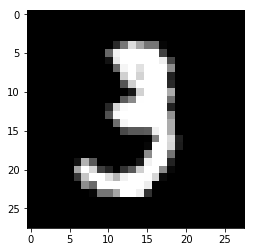

In [5]:
plt.imshow(x_train[10], cmap = "gray");

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
#initilizing model
model = Sequential()

#adding layers
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units = 95, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units  =128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = "softmax"))


#summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 95)                74575     
_________________________________________________________________
dropout_1 (Dropout)          (None, 95)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12288     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 88,153
Trainable params: 88,153
Non-trainable params: 0
__________________________________________________

In [8]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [9]:
#FITTING THE MODEL
trained_model = model.fit(x_train, y_train, epochs = 5, verbose = 1, batch_size = 57)



Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.3533 - accuracy: 0.8948
Epoch 2/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.1570 - accuracy: 0.9526
Epoch 3/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.1172 - accuracy: 0.9637
Epoch 4/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0995 - accuracy: 0.9697
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0832 - accuracy: 0.9743


In [10]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0, 0.5, 'loss')

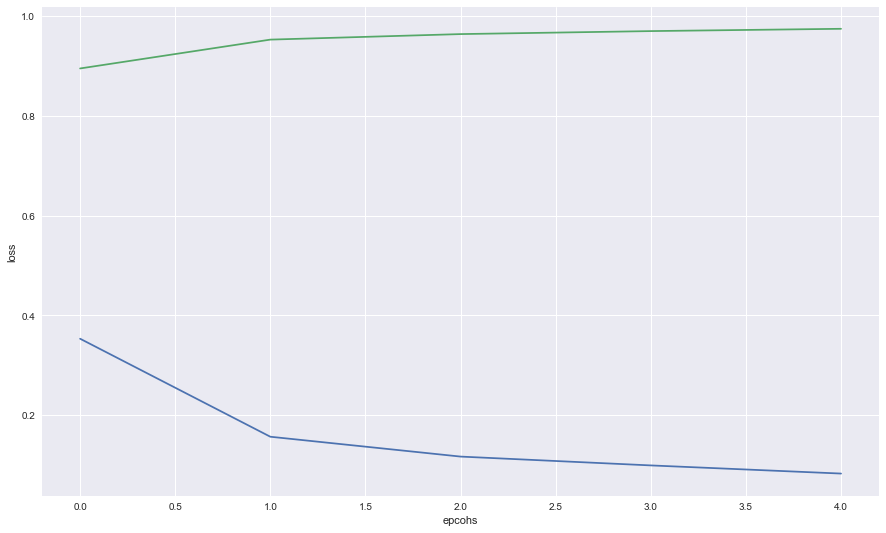

In [11]:
plt.style.use("seaborn")
plt.figure(figsize = (15,9))

plt.plot(trained_model.history["loss"])
plt.plot(trained_model.history["accuracy"])
plt.xlabel("epcohs")
plt.ylabel("loss")


In [13]:
model.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 0s 49us/step


0.9779000282287598

In [14]:

y_pred = model.predict_classes(x_test)

In [15]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test, y_pred)

In [19]:
import seaborn as  sns

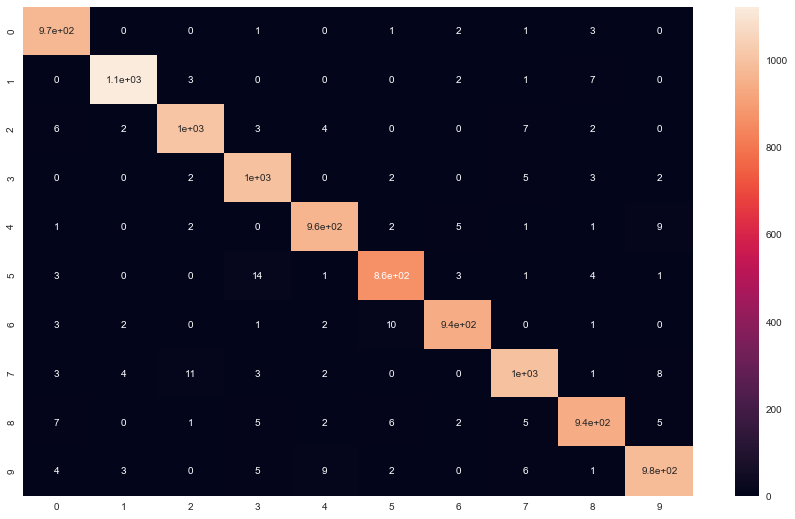

In [20]:
plt.figure(figsize = (15,9))
sns.heatmap(cm, annot = True)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



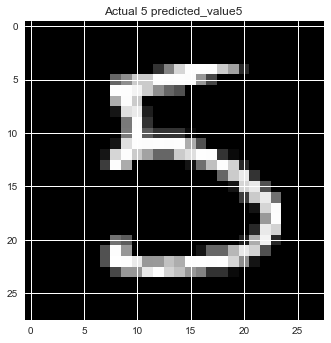

In [22]:

plt.imshow(x_test[15], cmap= "gray")
plt.title("Actual {} predicted_value{} ". format(y_test[15],y_pred[15]))

plt.show()


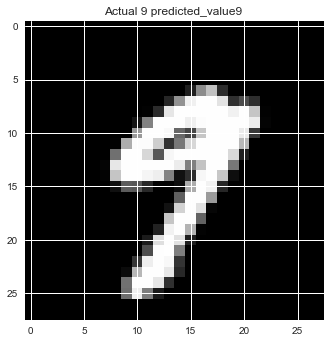

In [23]:

plt.imshow(x_test[20], cmap= "gray")
plt.title("Actual {} predicted_value{} ". format(y_test[20],y_pred[20]))

plt.show()


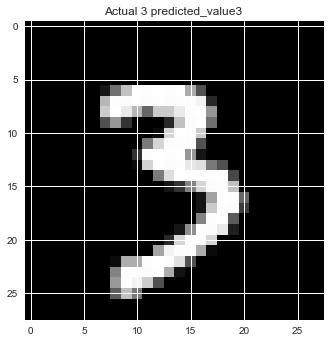

In [24]:

plt.imshow(x_test[30], cmap= "gray")
plt.title("Actual {} predicted_value{} ". format(y_test[30],y_pred[30]))

plt.show()
